<a href="https://colab.research.google.com/github/nagamamo/UofMalaya_Seminar/blob/main/3_Python_for_Finance%3A_CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3 Python for Finance: Capital Asset Pricing Model**

1.   **CAPM** defines stock price volatility as the cost of equity and explains the expected return by investing the cost of equity.
2.    In other words, the **CAPM** theoretically explains the trade-off relationship between the expected return and risk of individual stocks.
3.Unlike the **Capital Market Line** (**CML**), the **Security Market Line** (**SML**) of **CAPM** denotes the relationship between the expected return and risk (beta) of individual stocks.
4.   The **CAPM** interprets the extent to which individual stocks overperform or underperform all the listed stock market capitalization, i.e., market portfolio," as **risk premium  ≒ cost of shareholders' equity**.

# 3.1 Estimaging Beta: Libraries
The following four libraries are used to estimate the **market β** in this example.

You can also use ***statmodels*** instead of ***sklearn***.
The reason for using ***sklearn*** is to allow advanced users to estimate the **β value** using **machine learning**.


In [1]:
#[1]Import Libraries
import pandas as pd
import pandas_datareader as data
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 3.2 Data Retrieval
Let's compare **Tesla (TSLA.US)**, a 21st century EV maker, and **GM (GM.US)**, a 20th century gasoline car maker.

First, obtain stock price data by specifying the sample period  using datetime.


**Tesla (TSLA.US)** is listed on the **NASDAQ**, and **GM (GM.US)** is listed on the **NYSE**, so their respective market portfolios are the **NASDAQ** **Composite Index (^NDQ)** and the **Dow Jones Industrial Average Index (^DJI)**.

In [2]:
#[2] Data Retrieval
tickers=['TSLA.US','^NDQ','GM.US','^DJI']
start=datetime.date(2012,1,1)
end=datetime.date(2022,12,30)
df=data.DataReader(tickers,'stooq',start=start,end=end).sort_values(by='Date',ascending=True)

# 3.3 Data Pre-processing
Calculate the percentage change from the previous day using only closing price data and remove missing values.
Redefine the four variable names '**Tesla**', '**Nasdaq**', '**GM**', and '**DowJones**,' respectively.

The 3rd line instructions to change the variable name to the 4 variables on the 2nd line.

In [ ]:
#[3]Data Pre-processing
df = df['Close'].pct_change().dropna()*250
company_list=['Tesla','Nasdaq','GM','DowJones']
df.columns = company_list
df.describe()
df.head()

# 3.4 Estimating Beta: Tesla
Lines 2 and 3 convert the variables **df** [[‘**Nasda**q’]], **df**[['**Tesla**']] from the pandas dataframe to ndarrays.
Line 4-5 instructions to remove missing values for variable names.

In [4]:
#[4] Estimating Beta: Tesla
lr1 = LinearRegression()
X = df[['Nasdaq']].values
Y = df[['Tesla']].values
X1=np.delete(X,0,0)
Y1=np.delete(Y,0,0)
lr1.fit(X1, Y1)
print('β =  %.4f'% lr1.coef_[0][0])
print('intercept = %.4f'% lr1.intercept_[0])
print('R_squared = %.4f '% lr1.score(X1,Y1))

β =  1.4375
intercept = 0.3313
R_squared = 0.2614 


# 3.5 Estimating Beta: GM
Lines 2 and 3 convert the variables **df** [[‘**DowJone**s’]], **df**[[‘**GM **']] from the pandas dataframe to ndarrays.
Line 4-5 instructions to remove missing values for variable names.

In [5]:
#[5]Estimating Beta: GM
lr2 = LinearRegression()
Z = df[['DowJones']].values
W = df[['GM']].values
X2=np.delete(Z,0,0)
Y2=np.delete(W,0,0)
lr2.fit(X2, Y2)
print('β = %.4f'% lr2.coef_[0][0])
print('intercept = %.4f'% lr2.intercept_[0])
print('R_squared = %.4f '% lr2.score(X1,Y1))

β = 1.2683
intercept = -0.0077
R_squared = 0.2561 


# 3.6 Estimating Beta: Vidualization
Finally, describe and visualize the scatter diagram and theoretical line.

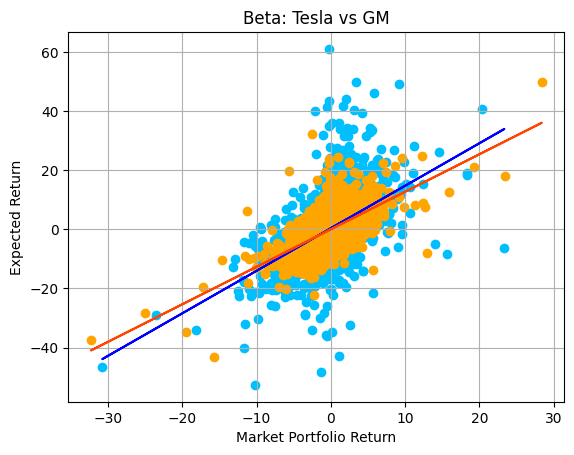

In [6]:
#[6]Estimating Beta: Visualization
plt.scatter(X1,Y1,color ='deepskyblue')
plt.plot(X1, lr1.predict(X1), color = 'blue')
plt.scatter(X2, Y2, color = 'orange')
plt.plot(X2, lr2.predict(X2), color = 'orangered')
plt.title('Beta: Tesla vs GM')
plt.xlabel('Market Portfolio Return')
plt.ylabel('Expected Return')
plt.grid()
plt.show()